<a href="https://colab.research.google.com/github/pornpailinjanjit/data_viz/blob/main/DataViz_Midterm_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบจำนวน 1 ข้อ คะแนน 150/100 (45% / 30% ของคะแนนทั้งหมด)

จุดมุ่งหมาย: ตัดเกรดรายวิชา Project จากข้อกำหนดต่อไปนี้


1. คะแนนประกอบด้วย 3 ส่วน

* คำแนนในห้องเรียน 10% (จากไฟล์ Project1-StuList-1-63-ตัดเกรด_renamed.xlsx)
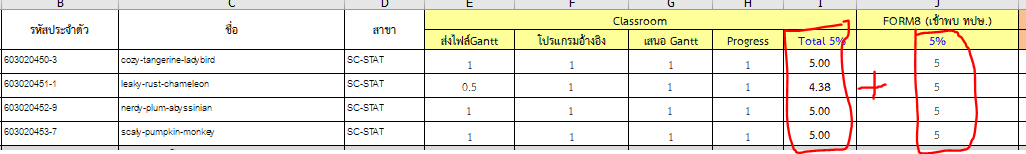

* คะแนนอาจารย์ที่ปรึกษา 30% (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

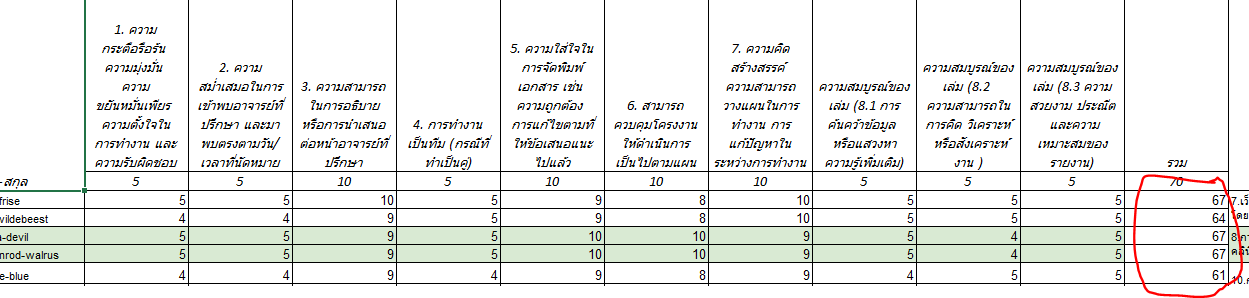

* คะแนนจากกรรมการในห้อง 60% (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) ***(คะแนนมาจากกรรมการท่านละ 30%)***

   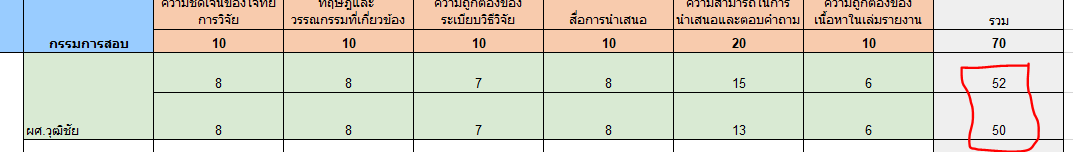

   ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/18LdS093tjLWbfrH1DV-8fM70hI0dOjh8?usp=sharing

2. โดยคะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน และเพื่อความยุติธรรมเนื่องจากอาจารย์แต่ละท่านมีเกณฑ์ในการให้คะแนนแตกต่างกัน คะแนนจากกรรมการในห้องจะถูกปรับน้ำหนักให้มีความยุติธรรมตามวิธีดังนี้

    1. ปรับ Z-score ของคะแนนของกรรมการสอบแต่ละท่าน (ไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx)
    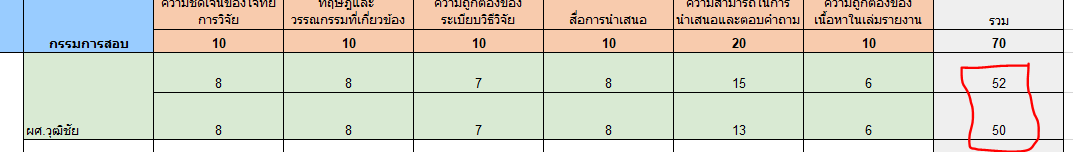
    2. นำ Z-score จากข้อ 1. มาเข้าสูตร

$adjusted\_score = 30 + \frac{-15\times(z\_score-2.3103448275862064)}{-4.788052880847054}$

(หรือใช้ function ```cal_adjusted_score()``` ข้างล่าง)

3. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A
***ข้อ 1-3 คะแนนรวม 120 คะแนน (ดึงข้อมูลและรวมข้อมูล 40  ปรับน้ำหนักคะแนน 40  ตัดเกรด 40)***
4. วาดกราฟ pararel coordinate ของผลคะแนนโดยแยกสีด้วยชื่ออาจารย์ที่ปรึกษา

ตัวอย่าง 
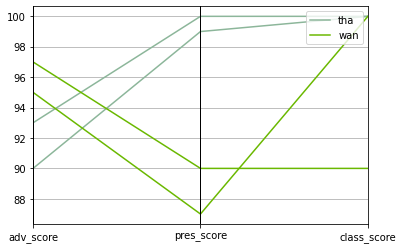

***ข้อ 4 30 คะแนน***


# ตัวอย่าง code บางส่วน ที่อาจจะมีประโยชน์กับการทำข้อสอบ

In [ ]:
import pandas as pd

In [ ]:
day0 = pd.read_excel('/content/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day0.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58


In [ ]:
day0_1 = day0.fillna(method='ffill')
day0_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [ ]:
all_aj_list = set(list(day0_1['กรรมการสอบ'].dropna()))
all_aj_list

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [ ]:
advisor = pd.read_excel('/content/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
advisor.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN


In [ ]:
def cal_adjusted_score(z_score):
    return round(30 + ((-15*(z_score-2.3103448275862064))/(-4.788052880847054)),2)

In [ ]:
d = [{'advisor':'tha','name':'skimpy-magenta-bombay','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'tha','name':'flimsy-lemon-budgerigar','adv_score':93,'pres_score':100,'class_score':100},
     {'advisor':'wan','name':'randy-gamboge-blue','adv_score':95,'pres_score':87,'class_score':100},
     {'advisor':'wan','name':'chummy-goldenrod-walrus','adv_score':97,'pres_score':90,'class_score':90}]
this = pd.DataFrame(d)
this

,advisor,name,adv_score,pres_score,class_score
0,tha,skimpy-magenta-bombay,90,99,100
1,tha,flimsy-lemon-budgerigar,93,100,100
2,wan,randy-gamboge-blue,95,87,100
3,wan,chummy-goldenrod-walrus,97,90,90


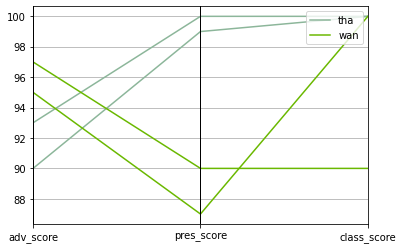

In [ ]:
pd.plotting.parallel_coordinates(this,'advisor',cols=['adv_score','pres_score','class_score']);

ข้อ 1

In [23]:
import pandas as pd

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import os
path = '/content/drive/shared with me/midterm 2021 data'

In [57]:
midterm_file_path = os.path.join(path,'คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.XLSX') 
print(midterm_file_path)

/content/drive/shared with me/midterm 2021 data/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.XLSX


In [58]:
midterm1_file_path = os.path.join(path,'คะแนนอาจารย์ที่ปรึกษา_renamed.XLSX') 
print(midterm1_file_path)

/content/drive/shared with me/midterm 2021 data/คะแนนอาจารย์ที่ปรึกษา_renamed.XLSX


In [59]:
midterm2_file_path = os.path.join(path,'Project1-StuList-1-63-ตัดเกรด_renamed.XLSX') 
print(midterm2_file_path)

/content/drive/shared with me/midterm 2021 data/Project1-StuList-1-63-ตัดเกรด_renamed.XLSX


In [60]:
a = path + 'Project1-StuList-1-63-ตัดเกรด_renamed.XLSX' 
print(a)

/content/drive/shared with me/midterm 2021 dataProject1-StuList-1-63-ตัดเกรด_renamed.XLSX


In [61]:
b = path + 'คะแนนอาจารย์ที่ปรึกษา_renamed.XLSX' 
print(b)

/content/drive/shared with me/midterm 2021 dataคะแนนอาจารย์ที่ปรึกษา_renamed.XLSX


In [62]:
c = path + 'คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.XLSX' 
print(c)

/content/drive/shared with me/midterm 2021 dataคะแนนสอบปากเปล่าของกรรมการสอบ_renamed.XLSX


In [63]:
day0 = pd.read_excel('/content/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx')
day0.head()

FileNotFoundError: ignored

In [48]:
project = pd.read_excel(midterm_file_path)
project   #หนูจะload data มาเก็บไว้

FileNotFoundError: ignored

In [ ]:
project1 = pd.read_excel(midterm1_file_path)
project1   #หนูจะload data มาเก็บไว้

In [ ]:
project2 = pd.read_excel(midterm1_file_path)
project2   #หนูจะload data มาเก็บไว้

In [56]:
d = pd.read_excel('/content/คะแนนสอบปากเปล่าของกรรมการสอบ.xlsx')
d.head()

FileNotFoundError: ignored

In [ ]:
d = pd.read_excel('/content/คะแนนสอบปากเปล่าของกรรมการสอบ.xlsx')
d.head()

ข้อ 2

เนื่องจากหนูโหลดข้อมูลไม่ได้หนูก็ไม่สามารถทำคะแนนจากกรรมการในห้องได้

In [ ]:
def cal_adjusted_score(z_score):
    return round(30 + ((-15*(z_score-2.3103448275862064))/(-4.788052880847054)),2)
    #score

ข้อ 3 หนูไม่มีข้อหนูเขียนแค่โค้ดตัดเกรดให้นะคะ TT

In [ ]:
def grade (score) :
    if score < 0:
      print (f'คะแนน {score} = error')
    elif score < 50 :
      print (f'You Get Grade  F')
    elif score< 55:
      print (f'You Get Grade  D')
    elif score< 60:
      print (f'You Get Grade D+')
    elif score< 65:
      print (f'You Get Grade C')
    elif score< 70:
      print (f'You Get Grade C+')
    elif score< 75:
      print (f'You Get Grade B')
    elif score< 80:  
      print (f'You Get Grade B+')
    elif score< 100:  
      print (f'You Get Grade A')
    elif score > 100:
      print (f'คะแนน {score} = error')

In [ ]:
def garde(x) :
  if x <= 49:
      return 0
  elif x >=50 and x <= 54:
      return 1.0
  elif x >=55 and x <= 59:
      return 1.5
  elif x >=60 and x <= 64:
      return 2.0
  elif x >=65 and x <= 69:
      return 2.5
  elif x >=70 and x <= 74:
      return 3.0
  elif x >=75 and x <= 79:
      return 3.5
  elif :
       return 4.0
number = int(input("คะแนน : "))
print('เกรดที่ได้รับ : %d' % grade(number))

ข้อ 4

In [67]:
d = [{'advisor':'thip','name':'leaky-rust-chameleon','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'thip','name':'greasy-ruby-bombay','adv_score':93,'pres_score':100,'class_score':100},
     {'advisor':'thip','name':'wiggy-silver-drever','adv_score':95,'pres_score':87,'class_score':100},
     {'advisor':'thip','name':'stinky-red-chow','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'thip','name':'bumpy-indigo-dolphin','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'thip','name':'randy-rust-lionfish','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'thip','name':'flaky-sepia-setter','adv_score':93,'pres_score':98,'class_score':100},
     {'advisor':'thip','name':'pasty-tomato-okapi','adv_score':95,'pres_score':90,'class_score':100},
     {'advisor':'thi','name':'paltry-plum-saola','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'thi','name':'cloudy-wheat-bobcat','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'thi','name':'sleepy-gamboge-zebra','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'thi','name':'bumpy-indigo-dolphin','adv_score':97,'pres_score':98,'class_score':100},
     {'advisor':'thi','name':'sickly-grey-dugong','adv_score':97,'pres_score':91,'class_score':90},
     {'advisor':'thi','name':'slaphappy-silver-monkey','adv_score':95,'pres_score':89,'class_score':100},
     {'advisor':'sukan','name':'whiny-pear-otter','adv_score':99,'pres_score':99,'class_score':100},
     {'advisor':'sukan','name':'craggy-cream-reindeer','adv_score':93,'pres_score':90,'class_score':100},
     {'advisor':'sukan','name':'cloudy-myrtle-kudu','adv_score':95,'pres_score':89,'class_score':100},
     {'advisor':'sukan','name':'lovely-asparagus-urchin','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'sukan','name':'clammy-zucchini-chicken','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'sukan','name':'greasy-tangerine-moorhen','adv_score':96,'pres_score':99,'class_score':100},
     {'advisor':'tha','name':'jumpy-apricot-frise','adv_score':93,'pres_score':89,'class_score':100},
     {'advisor':'tha','name':'boozy-thistle-wildebeest','adv_score':97,'pres_score':87,'class_score':100},
     {'advisor':'tha','name':'hasty-magnolia-devil','adv_score':97,'pres_score':96,'class_score':90},
     {'advisor':'tha','name':'chummy-goldenrod-walrus','adv_score':93,'pres_score':99,'class_score':100},
     {'advisor':'tha','name':'randy-gamboge-blue','adv_score':97,'pres_score':92,'class_score':90},
     {'advisor':'tha','name':'flimsy-lemon-budgerigar','adv_score':91,'pres_score':99,'class_score':100},
     {'advisor':'tha','name':'skimpy-magenta-bombay','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'Wut','name':'lumpy-carmine-slug','adv_score':90,'pres_score':95,'class_score':100},
     {'advisor':'Wut','name':'snappy-azure-balinese','adv_score':97,'pres_score':100,'class_score':100},
     {'advisor':'Wut','name':'pasty-bronze-booby','adv_score':95,'pres_score':89,'class_score':100},
     {'advisor':'Wut','name':'pokey-asparagus-frise','adv_score':92,'pres_score':90,'class_score':90},
     {'advisor':'Wut','name':'randy-charcoal-flamingo','adv_score':94,'pres_score':99,'class_score':100},
     {'advisor':'supan','name':'chewy-persimmon-catfish','adv_score':90,'pres_score':99,'class_score':98},
     {'advisor':'supan','name':'skanky-amaranth-ostrich','adv_score':90,'pres_score':99,'class_score':90},
     {'advisor':'supan','name':'greasy-eggplant-oyster','adv_score':93,'pres_score':100,'class_score':95},
     {'advisor':'supan','name':'randy-mauve-ibis','adv_score':95,'pres_score':97,'class_score':100},
     {'advisor':'supan','name':'hazy-beige-stoat','adv_score':92,'pres_score':97,'class_score':90},
     {'advisor':'supan','name':'squirrely-seashell-kingfisher','adv_score':90,'pres_score':91,'class_score':100},
     {'advisor':'supan','name':'surly-linen-hyena','adv_score':91,'pres_score':99,'class_score':100},
     {'advisor':'supan','name':'nippy-lilac-chin','adv_score':91,'pres_score':100,'class_score':100},
     {'advisor':'yu','name':'nerdy-plum-abyssinian','adv_score':93,'pres_score':89,'class_score':100},
     {'advisor':'yu','name':'gloppy-xanthic-retriever','adv_score':92,'pres_score':90,'class_score':90},
     {'advisor':'yu','name':'cloudy-myrtle-whippet','adv_score':90,'pres_score':90,'class_score':100},
     {'advisor':'yu','name':'cloudy-grey-walrus','adv_score':94,'pres_score':87,'class_score':100},
     {'advisor':'yu','name':'snazzy-auburn-lionfish','adv_score':97,'pres_score':87,'class_score':100},
     {'advisor':'yu','name':'whiny-peach-audemer','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'pala','name':'craggy-mustard-sponge','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'pala','name':'fuzzy-silver-discus','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'pala','name':'lousy-corn-mule','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'pala','name':'muggy-charcoal-akita','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'pala','name':'stinky-wisteria-nightingale','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'pala','name':'hazy-aqua-peccary','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'Wi','name':'tasty-myrtle-ant','adv_score':93,'pres_score':100,'class_score':100},
     {'advisor':'Wi','name':'skanky-burgundy-kingfisher','adv_score':95,'pres_score':87,'class_score':100},
     {'advisor':'Wi','name':'sleazy-mauve-akita','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'Wi','name':'crappy-burgundy-quoll','adv_score':91,'pres_score':91,'class_score':100},
     {'advisor':'Wi','name':'geeky-harlequin-duck','adv_score':97,'pres_score':94,'class_score':100},
     {'advisor':'Wi','name':'gummy-olivine-ibis','adv_score':97,'pres_score':89,'class_score':100},
     {'advisor':'Wi','name':'frumpy-gamboge-emu','adv_score':93,'pres_score':94,'class_score':100},
     {'advisor':'Wi','name':'ugly-harlequin-octopus','adv_score':92,'pres_score':93,'class_score':100},
     {'advisor':'Wi','name':'craggy-cream-paradise','adv_score':95,'pres_score':87,'class_score':100},
     {'advisor':'Wan','name':'skinny-bronze-dormouse','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'Wan','name':'freaky-lemon-peccary','adv_score':92,'pres_score':94,'class_score':100},
     {'advisor':'Wan','name':'flabby-green-fish','adv_score':98,'pres_score':94,'class_score':100},
     {'advisor':'Wan','name':'skinny-heliotrope-kudu','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'Wan','name':'messy-white-toucan','adv_score':91,'pres_score':93,'class_score':100},
     {'advisor':'than','name':'chewy-lilac-shark','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'than','name':'greasy-olivine-neanderthal','adv_score':97,'pres_score':100,'class_score':100},
     {'advisor':'than','name':'hasty-dandelion-grasshopper','adv_score':94,'pres_score':87,'class_score':100},
     {'advisor':'than','name':'stinky-red-chow','adv_score':97,'pres_score':98,'class_score':90},
     {'advisor':'than','name':'ugly-myrtle-walrus','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'than','name':'gloppy-fuchsia-akbash','adv_score':90,'pres_score':92,'class_score':100},
     {'advisor':'than','name':'flabby-asparagus-heron','adv_score':93,'pres_score':97,'class_score':100},
     {'advisor':'than','name':'skanky-copper-affenpinscher','adv_score':95,'pres_score':87,'class_score':100},
     {'advisor':'Au','name':'chummy-azure-walrus','adv_score':97,'pres_score':90,'class_score':90},
     {'advisor':'Au','name':'breezy-pear-macaw','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'Au','name':'cozy-tangerine-ladybird','adv_score':96,'pres_score':90,'class_score':90},
     {'advisor':'Au','name':'scaly-pumpkin-monkey','adv_score':99,'pres_score':99,'class_score':100},
     {'advisor':'Au','name':'scanty-razzmatazz-rabbit','adv_score':97,'pres_score':97,'class_score':90},
     {'advisor':'Au','name':'grumpy-flax-bonobo','adv_score':99,'pres_score':92,'class_score':100}] #เนื่องจากหนูไม่ทราบคะแนนเลยสมมติขึ้นมา
this = pd.DataFrame(d)
this

,advisor,name,adv_score,pres_score,class_score
0,thip,leaky-rust-chameleon,90,99,100
1,thip,greasy-ruby-bombay,93,100,100
2,thip,wiggy-silver-drever,95,87,100
3,thip,stinky-red-chow,97,90,90
4,thip,bumpy-indigo-dolphin,90,99,100
...,...,...,...,...,...
75,Au,breezy-pear-macaw,90,99,100
76,Au,cozy-tangerine-ladybird,96,90,90
77,Au,scaly-pumpkin-monkey,99,99,100
78,Au,scanty-razzmatazz-rabbit,97,97,90


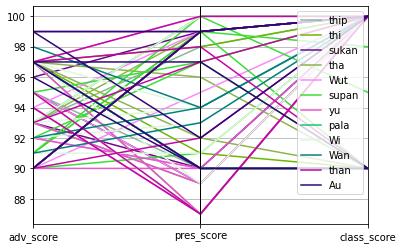

In [68]:
pd.plotting.parallel_coordinates(this,'advisor',cols=['adv_score','pres_score','class_score']);

#เนื่องจากหนูไม่ทราบคะแนนเลยสมมติขึ้นมา
